# Assignment 1
## Roll no. `41313`

### Introduction to Neural Networks
#### Problem Statement
Create & Visualize Neural Network for the given data. (Use python)

Note: download dataset using Kaggle. Keras, ANN visualizer, graph viz libraries are
required.

### Image Classification and Visualisation of Fashion MNIST Dataset 
Source- Tensorflow library / Kaggle

In [1]:
import tensorflow as tf
print(tf.__version__)

2.20.0


## 1. Loading the dataset

In [3]:
mnist = tf.keras.datasets.fashion_mnist

## 2. Splitting the dataset 

In [ ]:
(train_img, train_label), (test_images, test_labels) = mnist.load_data()

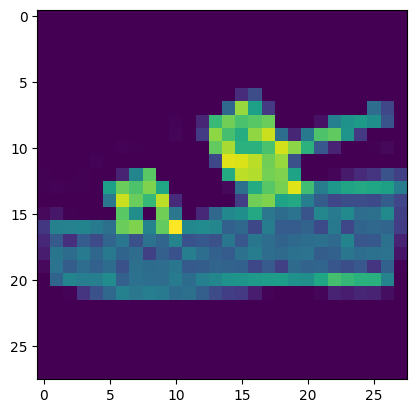

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_img[12])
# print(f"Training Labels\n{train_label[0]}\nTraining Data\n{train_img[0]}")

In [6]:
train_img = train_img / 255.0
test_images = test_images / 255.0

## 3. Model Layers

- Flatten: This layer just flattens the numpy array so that we can get away with using a single layer for this 28x28 array
- The Dense layers add a layer of neurons and have an activation function. This function decides how that layer will behave.
- More layers does not always mean better results but will always take more resources.
- relu layer is kinda like this: x if x>0 else 0
- softmax layer takes a batch of data and puts the greatest value of that batch as 1 and others as 0.
```python3
last_layer = [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05]
last_layer_with_softmax = [0,0,0,0,1,0,0,0,0]
```


In [7]:
model = tf.keras.Sequential(
    [tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]
)

In [8]:
class callbackAccuracy(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.92:
      print(f'\nAccuracy has reached 92% threshhold.\nStopping training')
      self.model.stop_training = True
callback = callbackAccuracy()

### 3.1 Compiling the model with `optimiser`, `loss function` and `metrics`
This is where we train the model to fit the data.
- More epochs are not always better
- A callback function can be written to prevent overfitting of data
- metrics indicate the metrics which the model will show the performance of the model after every epoch

In [12]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_img, train_label, epochs=5, callbacks=[callback])

Epoch 1/5


2025-09-01 17:07:32.720517: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8297 - loss: 0.4785
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8695 - loss: 0.3573
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8797 - loss: 0.3224
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8905 - loss: 0.2970
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8963 - loss: 0.2787


## 4. Evaluating Model Performance

In [27]:
print(f"Loss\t\t     Accuracy\n{model.evaluate(test_images, test_labels)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8707 - loss: 0.3474
Loss		     Accuracy
[0.3473718762397766, 0.8707000017166138]


In [14]:
classifications = model.predict(test_images)

print(classifications[0])
print(max(classifications[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[8.1324670e-06 2.3577186e-08 1.5488530e-07 1.9171994e-08 2.8635071e-07
 2.7278008e-02 1.7619051e-06 4.8512474e-02 7.7830401e-07 9.2419821e-01]
0.9241982


## 5. Model Visualisation

### Save Model diagram

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (32, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 512)              │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,221,152 (4.66 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)

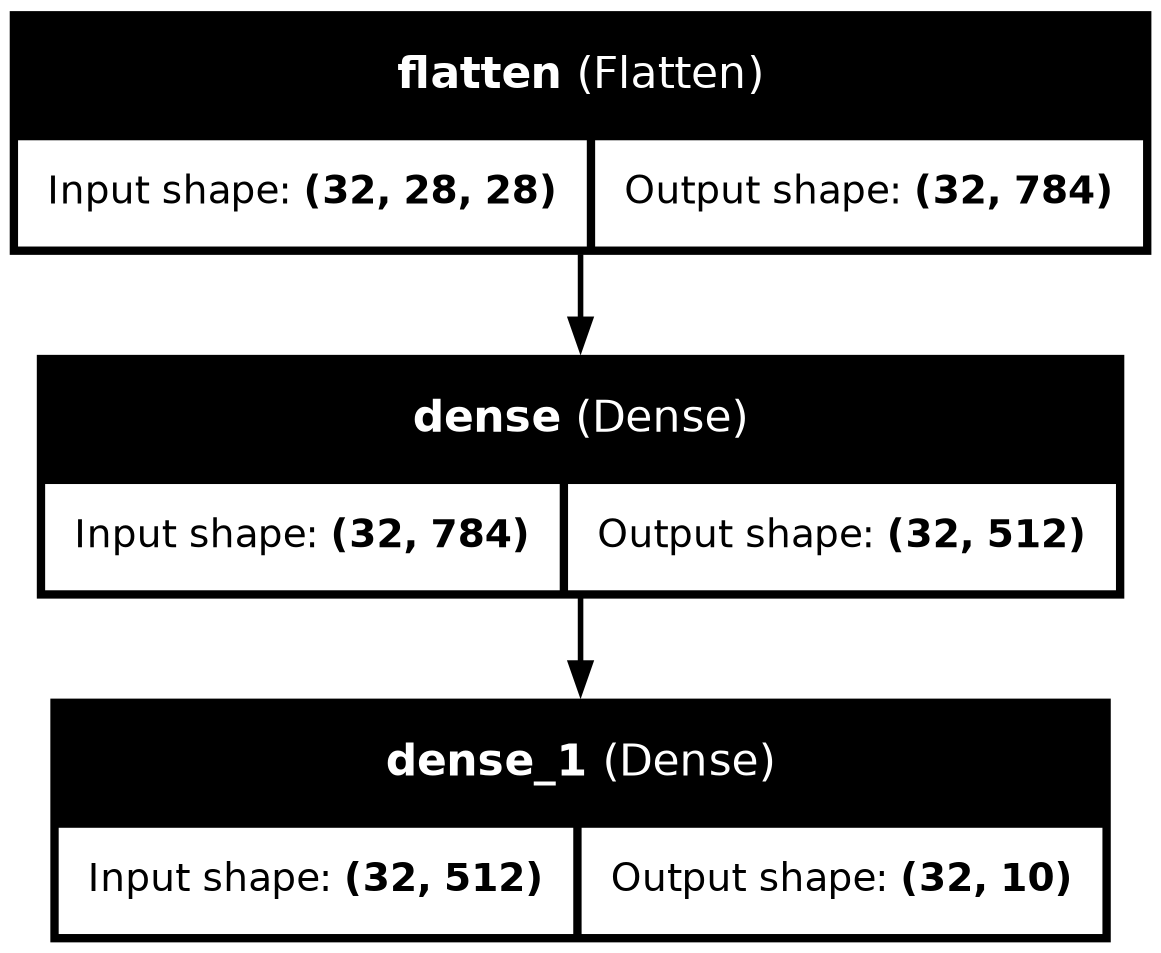

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
